In [71]:
#The main Context of this project is to Cluster customers into groups so that a we can extract out informations from it.

#Dataset : https://www.kaggle.com/mehdidag/black-friday

#--1.IMPORTING lIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [72]:
#--2.IMPORTING DATA AND VIEW

df = pd.read_csv(r'C:\Users\Mani\Desktop\BlackFriday.csv')
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Product_Category_3,373299,0.69
Product_Category_2,166986,0.31
Purchase,0,0.00
Product_Category_1,0,0.00
Marital_Status,0,0.00
Stay_In_Current_City_Years,0,0.00
City_Category,0,0.00
Occupation,0,0.00
Age,0,0.00
Gender,0,0.00


In [73]:
#Dropped Product_Category_3 and Product_Category_2 as 30% of it's values are null.
df.drop(['Product_Category_3', 'Product_Category_2'], axis=1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [74]:
#--3.Feature Engineering

#In the dataset, its not grouped by users as each users have bought more than one product.

#Finding how much did each customer spend in each category in Product_Category_1.
df1 = df.pivot_table(index='User_ID', columns='Product_Category_1', values='Purchase', aggfunc='sum').add_prefix('pc_').fillna(0)
df['User_ID'].nunique()
df1.head()

Product_Category_1,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10,pc_11,pc_12,pc_13,pc_14,pc_15,pc_16,pc_17,pc_18
User_ID,,,,,,,,,,,,,,,,,,
1000001,"61,604.00","12,842.00","119,859.00","5,612.00","15,749.00","16,622.00",0.00,"69,542.00",0.00,0.00,0.00,"4,194.00",0.00,"11,011.00",0.00,"16,446.00",0.00,0.00
1000002,"413,669.00","15,870.00",0.00,0.00,"80,490.00","89,995.00",0.00,"210,329.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1000003,"228,578.00","29,054.00","10,906.00",0.00,"63,426.00",0.00,0.00,"5,817.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"3,854.00"
1000004,"205,987.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1000005,"194,401.00","26,132.00","10,851.00","7,746.00","116,424.00","65,740.00","74,954.00","260,551.00",0.00,0.00,"10,548.00",0.00,0.00,"11,085.00","17,374.00","25,195.00",0.00,0.00


In [75]:
#Product_Id is not useful hence taking how much products the user buy
df2 = df.groupby(['User_ID'])['Product_ID'].count()
df2.head()


User_ID
1000001     34
1000002     76
1000003     29
1000004     13
1000005    106
Name: Product_ID, dtype: int64

In [76]:
#Grouping by user and getting their other attributes.
df3 =df.groupby(['User_ID'])['Gender','Age','City_Category','Stay_In_Current_City_Years','Occupation'].agg(pd.Series.mode)
df3.head()

,Gender,Age,City_Category,Stay_In_Current_City_Years,Occupation
User_ID,,,,,
1000001,F,0-17,A,2,10
1000002,M,55+,C,4+,16
1000003,M,26-35,A,3,15
1000004,M,46-50,B,2,7
1000005,M,26-35,A,1,20


In [77]:
#Grouping by user and taking the sum of their purchases
df4 = df.groupby(['User_ID'])['Purchase'].sum()
df4.head()

User_ID
1000001    333481
1000002    810353
1000003    341635
1000004    205987
1000005    821001
Name: Purchase, dtype: int64

In [78]:
#Merging
df7 =pd.merge( pd.DataFrame(df2),df3,on='User_ID')
df7.head()

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Occupation
User_ID,,,,,,
1000001,34,F,0-17,A,2,10
1000002,76,M,55+,C,4+,16
1000003,29,M,26-35,A,3,15
1000004,13,M,46-50,B,2,7
1000005,106,M,26-35,A,1,20


In [79]:
df8 = pd.merge(df7,df1, 'left', on = ['User_ID'] )
df8.head()

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Occupation,pc_1,pc_2,pc_3,pc_4,...,pc_9,pc_10,pc_11,pc_12,pc_13,pc_14,pc_15,pc_16,pc_17,pc_18
User_ID,,,,,,,,,,,,,,,,,,,,,
1000001,34,F,0-17,A,2,10,"61,604.00","12,842.00","119,859.00","5,612.00",...,0.00,0.00,0.00,"4,194.00",0.00,"11,011.00",0.00,"16,446.00",0.00,0.00
1000002,76,M,55+,C,4+,16,"413,669.00","15,870.00",0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1000003,29,M,26-35,A,3,15,"228,578.00","29,054.00","10,906.00",0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"3,854.00"
1000004,13,M,46-50,B,2,7,"205,987.00",0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1000005,106,M,26-35,A,1,20,"194,401.00","26,132.00","10,851.00","7,746.00",...,0.00,0.00,"10,548.00",0.00,0.00,"11,085.00","17,374.00","25,195.00",0.00,0.00


In [80]:
df9 = pd.merge(df8,pd.DataFrame(df4), 'left', on = ['User_ID'] )
df9.head()

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Occupation,pc_1,pc_2,pc_3,pc_4,...,pc_10,pc_11,pc_12,pc_13,pc_14,pc_15,pc_16,pc_17,pc_18,Purchase
User_ID,,,,,,,,,,,,,,,,,,,,,
1000001,34,F,0-17,A,2,10,"61,604.00","12,842.00","119,859.00","5,612.00",...,0.00,0.00,"4,194.00",0.00,"11,011.00",0.00,"16,446.00",0.00,0.00,333481
1000002,76,M,55+,C,4+,16,"413,669.00","15,870.00",0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,810353
1000003,29,M,26-35,A,3,15,"228,578.00","29,054.00","10,906.00",0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"3,854.00",341635
1000004,13,M,46-50,B,2,7,"205,987.00",0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,205987
1000005,106,M,26-35,A,1,20,"194,401.00","26,132.00","10,851.00","7,746.00",...,0.00,"10,548.00",0.00,0.00,"11,085.00","17,374.00","25,195.00",0.00,0.00,821001


In [81]:
df9.reset_index(drop=False, inplace=True)

In [84]:
#Encoding
df9['Age'] = df9['Age'].map({"0-17":0,"18-25":1,"26-35":2 ,"36-45":3,'46-50':4,'51-55':5,'55+':6});
df9['Stay_In_Current_City_Years'] = df9['Stay_In_Current_City_Years'].map({"0":0,"1":1,"2":2 ,"3":3,'4+':4});
df9['City_Category'] = df9['City_Category'].map({"A":0,"B":1,"C":2 });
df9['Gender'] = df9['Gender'].map({"M":0,"F":1}).astype(int);

In [85]:
pd.options.display.float_format = '{:,.2f}'.format
df9.head()

In [91]:
#Getting top 5 categories in Product_Category_1 where users
gh = df9.pivot_table(index='User_ID',
               margins=True,
               margins_name='total',  # defaults to 'All'
               aggfunc=sum).tail(1)
gh.T.sort_values(by=['total'])

User_ID,total
Gender,"1,666.00"
City_Category,"7,985.00"
Stay_In_Current_City_Years,"10,949.00"
Age,"15,437.00"
Occupation,"48,031.00"
Product_ID,"537,577.00"
pc_13,"3,931,050.00"
pc_12,"5,235,883.00"
pc_17,"5,758,702.00"
pc_9,"6,277,472.00"


pc_1
skew:  2.140188084734928
Kurtosis:  5.461005948443097


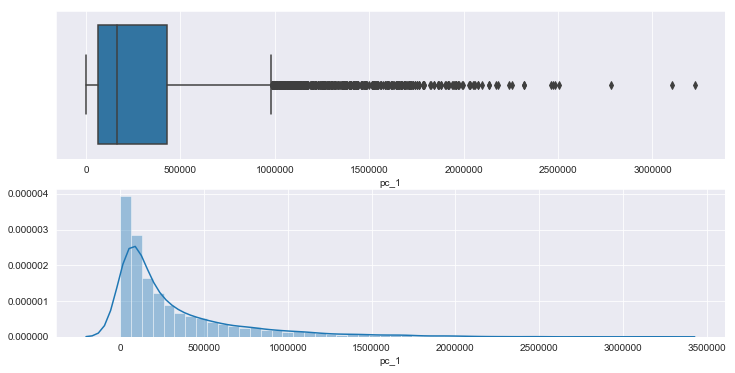

pc_6
skew:  2.46603661394529
Kurtosis:  9.040847412625965


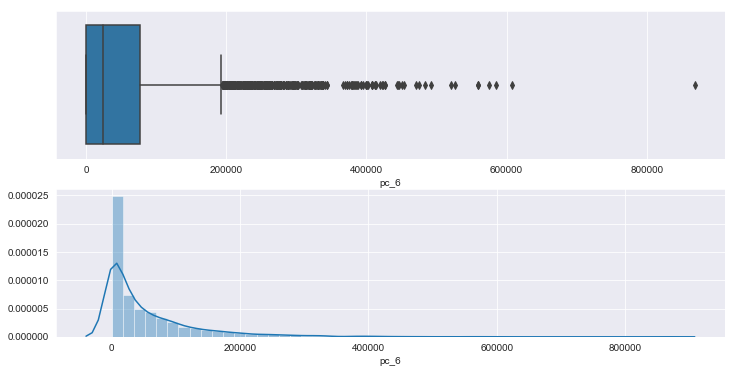

pc_2
skew:  2.807735434309812
Kurtosis:  11.149196663337808


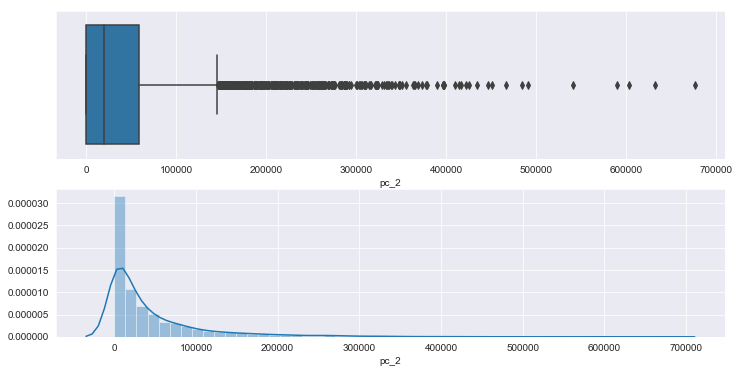

pc_5
skew:  2.3519975772165855
Kurtosis:  6.920549706210741


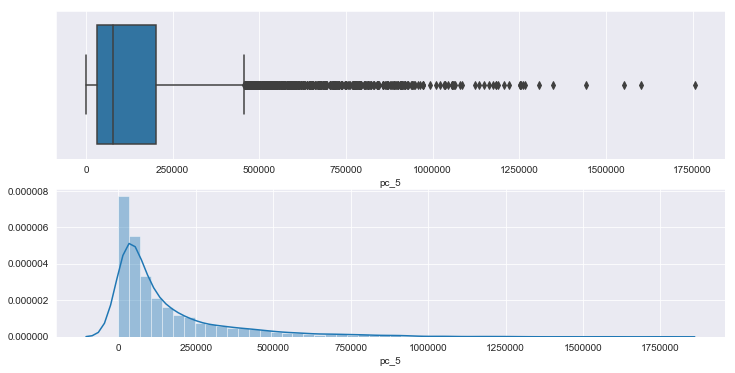

pc_8
skew:  2.963075484026498
Kurtosis:  12.850318605816739


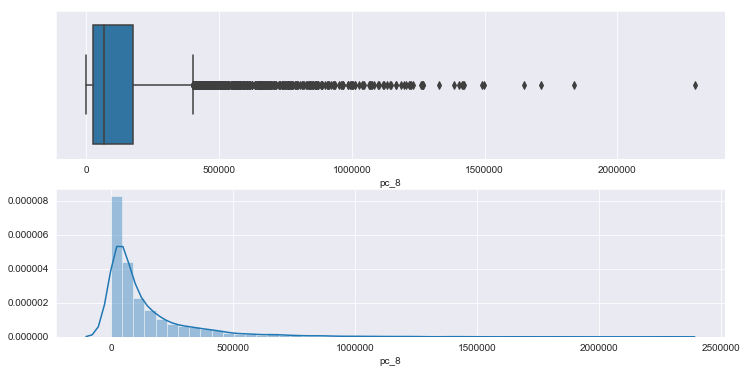

In [92]:
#Checking Skewness and Kurtosis for the top 5 product categories
final_list = ['pc_1','pc_6','pc_2','pc_5','pc_8','Age']
for col in final_list:
    f,(ax1,ax2)=plt.subplots(nrows=2,ncols=1, figsize=(12,6))
    print(col)
    print('skew: ',df9[col].skew())
    print('Kurtosis: ',df9[col].kurt())
    sns.boxplot(df9[col], ax=ax1)
    sns.distplot(df9[col], ax=ax2)
    plt.show()

In [93]:
#Transformation and Standardization

from sklearn import preprocessing
from scipy import stats
df9['pc_1_t'] = pd.DataFrame(preprocessing.scale(pd.DataFrame(stats.boxcox(df9['pc_1']+0.01)[0])))
df9['pc_2_t'] = pd.DataFrame(preprocessing.scale(pd.DataFrame(stats.boxcox(df9['pc_2']+0.01)[0])))
df9['pc_6_t'] = pd.DataFrame(preprocessing.scale(pd.DataFrame(stats.boxcox(df9['pc_6']+0.01)[0])))
df9['pc_5_t'] = pd.DataFrame(preprocessing.scale(pd.DataFrame(stats.boxcox(df9['pc_5']+0.01)[0])))
df9['pc_8_t'] = pd.DataFrame(preprocessing.scale(pd.DataFrame(stats.boxcox(df9['pc_8']+0.01)[0])))
df9['Age_t'] = pd.DataFrame(preprocessing.scale(pd.DataFrame(stats.boxcox(df9['Age']+0.01)[0])))

pc_1_t
skew:  -0.03869450461652838
Kurtosis:  0.2754014717448836


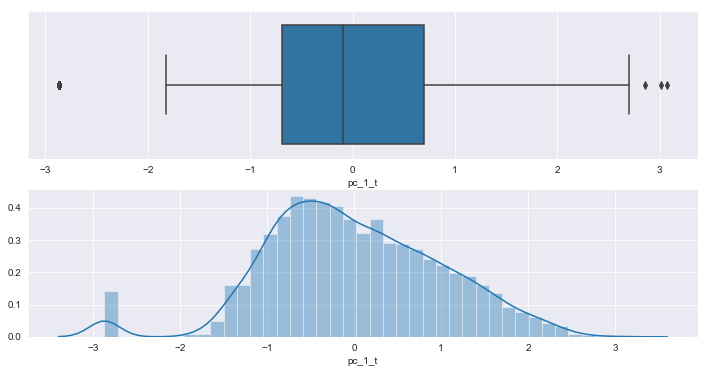

pc_6_t
skew:  -0.6107212939220307
Kurtosis:  -1.344655511739472


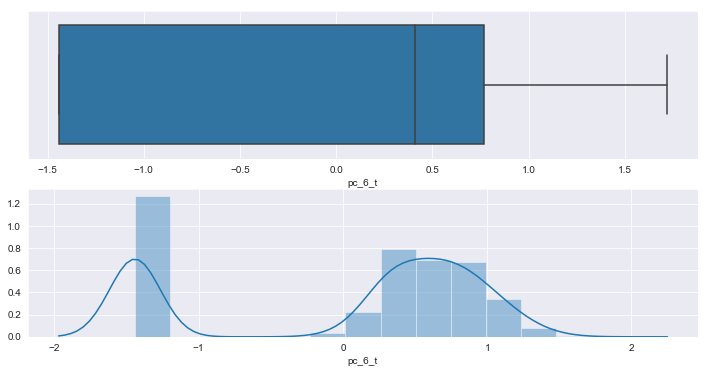

pc_2_t
skew:  -0.6651834293992765
Kurtosis:  -1.070463984597532


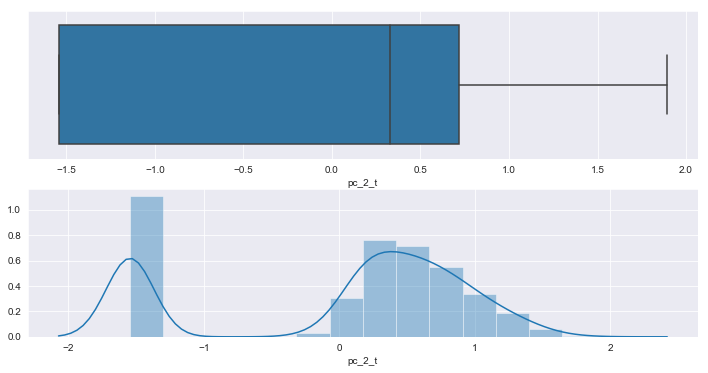

pc_5_t
skew:  -0.02253668191425734
Kurtosis:  0.43308552022339164


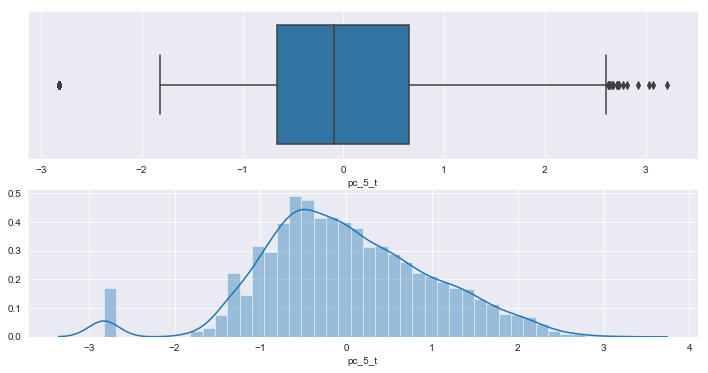

pc_8_t
skew:  -0.09807552732802131
Kurtosis:  0.6097447394597846


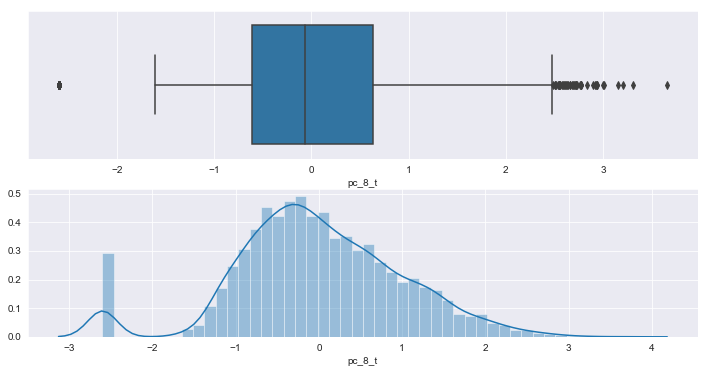

Age_t
skew:  -0.06881235696036715
Kurtosis:  0.12834244355983593


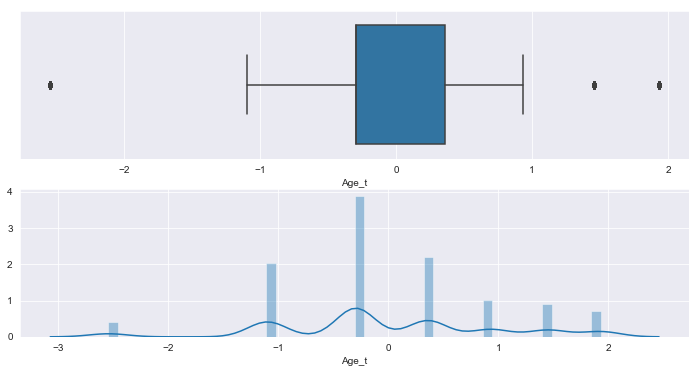

In [94]:
final_list = ['pc_1_t','pc_6_t','pc_2_t','pc_5_t','pc_8_t','Age_t']
for col in final_list:
    f,(ax1,ax2)=plt.subplots(nrows=2,ncols=1, figsize=(12,6))
    print(col)
    print('skew: ',df9[col].skew())
    print('Kurtosis: ',df9[col].kurt())
    sns.boxplot(df9[col], ax=ax1)
    sns.distplot(df9[col], ax=ax2)
    plt.show()

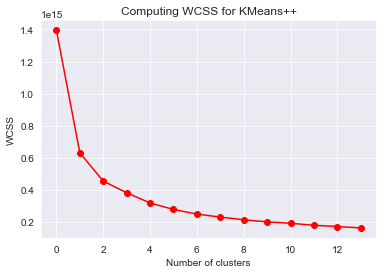

In [49]:
AgeByCategory = ['Age','pc_1','pc_6','pc_2','pc_8','pc_5']
from sklearn.cluster import KMeans
# Using the Elbow method to find a good number of clusters using WCSS
wcss = []
for ii in range( 1, 15 ):
    kmeans = KMeans(n_clusters=ii, init="k-means++", n_init=10, max_iter=300) 
    kmeans.fit_predict( df9[AgeByCategory])
    wcss.append( kmeans.inertia_ )
    
plt.plot( wcss, 'ro-', label="WCSS")
plt.title("Computing WCSS for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [95]:
#Taking the number of clusters as 6

#Segmentation using age and top 5 product categories.

kmeans = KMeans(n_clusters=6, init="k-means++", n_init=20, max_iter=300) 
y_pred = kmeans.fit_predict( df9[AgeByCategory] )
import seaborn as sns
df9["cluster"] = y_pred
df9["cluster"]

0       2
1       4
2       2
3       2
4       0
5       2
6       2
7       0
8       2
9       5
10      2
11      2
12      4
13      2
14      4
15      2
16      4
17      1
18      4
19      2
20      2
21      4
22      4
23      0
24      4
25      5
26      2
27      2
28      4
29      2
       ..
5861    4
5862    2
5863    2
5864    2
5865    2
5866    5
5867    2
5868    4
5869    2
5870    2
5871    4
5872    2
5873    4
5874    4
5875    0
5876    2
5877    2
5878    2
5879    2
5880    4
5881    2
5882    2
5883    4
5884    2
5885    0
5886    5
5887    0
5888    2
5889    2
5890    0
Name: cluster, Length: 5891, dtype: int32

In [ ]:
#I'll be continuing digging in for each clusters after it.